In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform
import joblib

%load_ext autoreload
%autoreload 2

# data = GSHEWaveform.read_shooting(13, "../results", 0.2)

In [3]:
data = joblib.load("/Users/richard/Downloads/shooting_data.p")

In [5]:
grid = data["grid"]
betas = data["betas"]
Xgeo = data["Xgeo"]

mugeo = Xgeo[:, 8]

# These fill occasional NaNs with nearest neighborus
hull = GSHEWaveform.build_shadowhull(grid, mugeo, N=200)
mugeo = GSHEWaveform.fillshadow(grid, mugeo, hull)

<IPython.core.display.Javascript object>


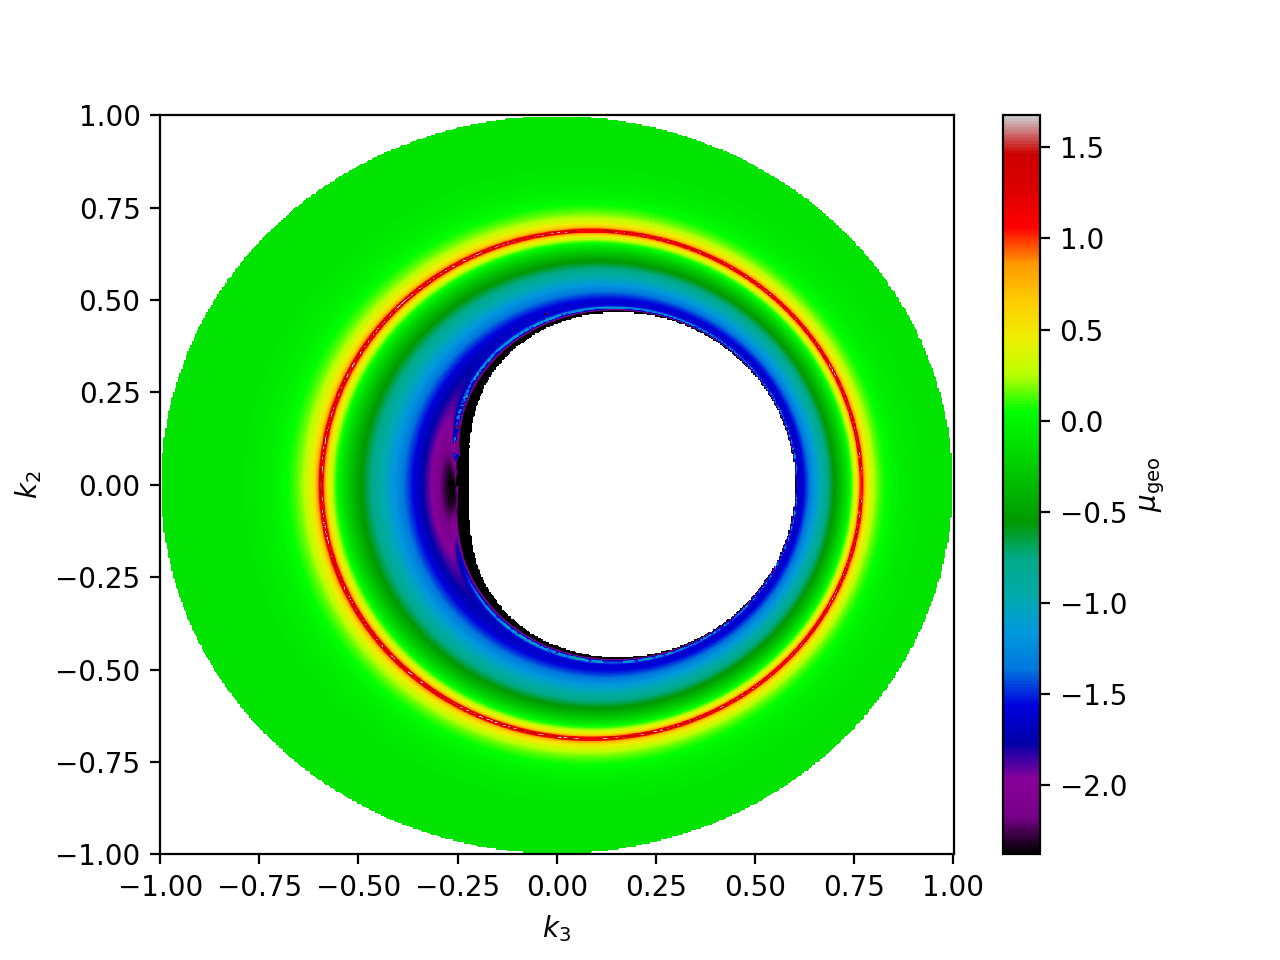

In [6]:

X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(np.abs(mugeo)), 2500, method="linear")
qs = [1, 99.99] # Colourbar percentiles

GSHEWaveform.setmplstyle()

fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)


fig.colorbar(cm, ax=ax, label=r"$\mu_{\rm geo}$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
fig.show()